In [1]:
import pandas as pd
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pygwalker as pyg
# import openai

In [2]:
df = pd.read_csv('Connections.csv', skiprows = 3)
df['Connected Year'] = pd.to_datetime(df['Connected On']).dt.year
df['Connected Month'] = pd.to_datetime(df['Connected On']).dt.month
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4228 entries, 0 to 4227
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   First Name       4159 non-null   object
 1   Last Name        4159 non-null   object
 2   URL              4159 non-null   object
 3   Email Address    59 non-null     object
 4   Company          4098 non-null   object
 5   Position         4099 non-null   object
 6   Connected On     4228 non-null   object
 7   Connected Year   4228 non-null   int32 
 8   Connected Month  4228 non-null   int32 
dtypes: int32(2), object(7)
memory usage: 264.4+ KB


In [3]:
pyg.walk(df)

Box(children=(HTML(value='\n<div id="ifr-pyg-0006213bac5bd3a7YeldcTtHDR4uKSoP" style="height: auto">\n    <hea…

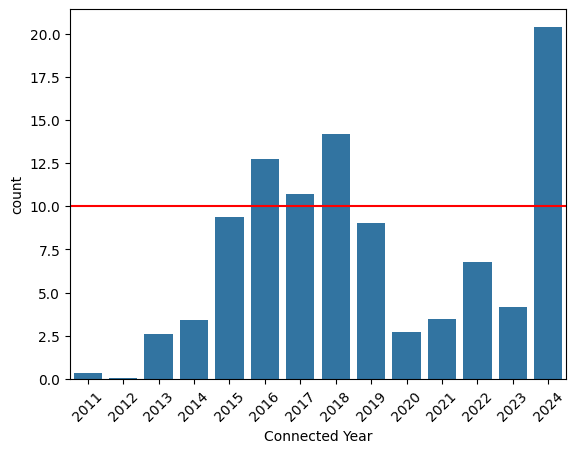

In [11]:
percentage_connections_year = df['Connected Year'].value_counts()/df['Connected Year'].value_counts().sum()*100
sns.barplot(percentage_connections_year)
# Rotate the x-ticks
plt.xticks(rotation=45)
# Display the plot
plt.axhline(y = 10, color = 'r', linestyle = '-') 
plt.show()

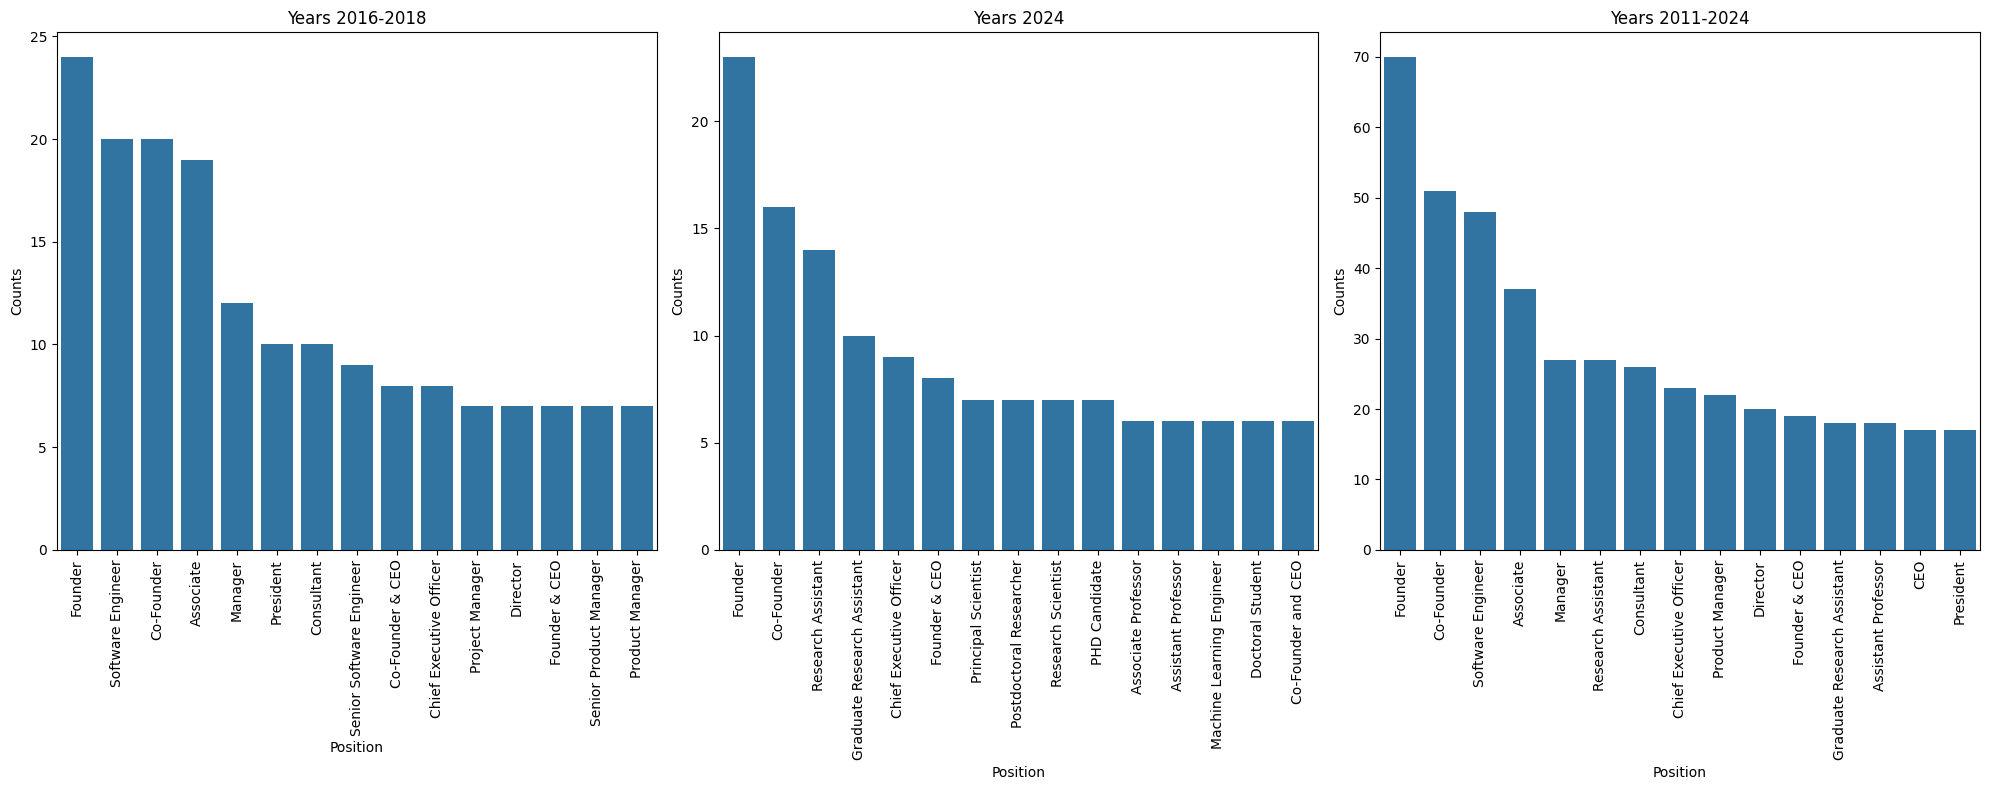

In [12]:
# Filter and get the top 15 positions for each plot
transition1 = df.loc[df['Connected Year'].isin([2016, 2017, 2018])]['Position'].value_counts().head(15)
transition2 = df.loc[df['Connected Year'].isin([2023, 2024])]['Position'].value_counts().head(15)
all_years = df['Position'].value_counts().head(15)

# Create a figure with 3 subplots in a row
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

# Plot 1
sns.barplot(x=transition1.index, y=transition1.values, ax=axs[0])
axs[0].set_title('Years 2016-2018')
axs[0].set_xlabel('Position')
axs[0].set_ylabel('Counts')
axs[0].tick_params(axis='x', rotation=90)

# Plot 2
sns.barplot(x=transition2.index, y=transition2.values, ax=axs[1])
axs[1].set_title('Years 2024')
axs[1].set_xlabel('Position')
axs[1].set_ylabel('Counts')
axs[1].tick_params(axis='x', rotation=90)

# Plot 3
sns.barplot(x=all_years.index, y=all_years.values, ax=axs[2])
axs[2].set_title('Years 2011-2024')
axs[2].set_xlabel('Position')
axs[2].set_ylabel('Counts')
axs[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

### Top 15 Companies connected with across Years 2016-2018, 2024, and across all years

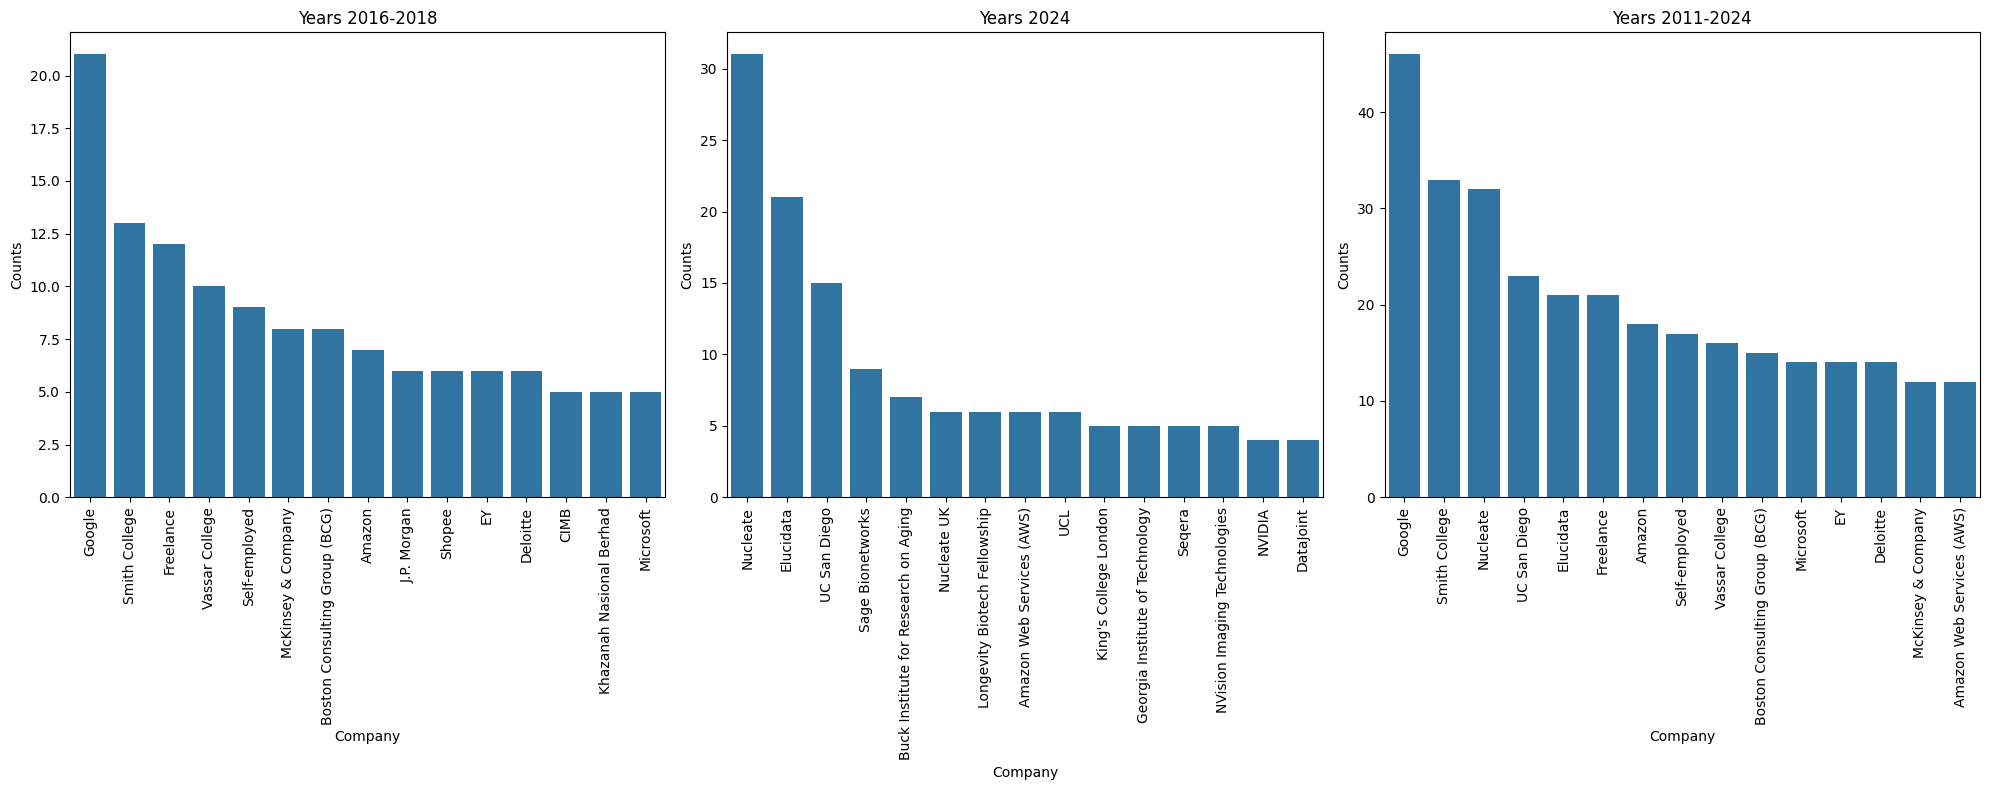

In [14]:
# Filter and get the top 15 positions for each plot
transition1 = df.loc[df['Connected Year'].isin([2016, 2017, 2018])]['Company'].value_counts().head(15)
transition2 = df.loc[df['Connected Year'].isin([2023, 2024])]['Company'].value_counts().head(15)
all_years = df['Company'].value_counts().head(15)

# Create a figure with 3 subplots in a row
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

# Plot 1
sns.barplot(x=transition1.index, y=transition1.values, ax=axs[0])
axs[0].set_title('Years 2016-2018')
axs[0].set_xlabel('Company')
axs[0].set_ylabel('Counts')
axs[0].tick_params(axis='x', rotation=90)

# Plot 2
sns.barplot(x=transition2.index, y=transition2.values, ax=axs[1])
axs[1].set_title('Years 2024')
axs[1].set_xlabel('Company')
axs[1].set_ylabel('Counts')
axs[1].tick_params(axis='x', rotation=90)

# Plot 3
sns.barplot(x=all_years.index, y=all_years.values, ax=axs[2])
axs[2].set_title('Years 2011-2024')
axs[2].set_xlabel('Company')
axs[2].set_ylabel('Counts')
axs[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

### Historical Overlap of Top Companies: 2016-2018 and 2024 vs. All-Time Patterns








In [20]:
companies_2016_2018 = set(df.loc[df['Connected Year'].isin([2016, 2017, 2018])]['Company'].value_counts().head(20).index)
companies_2024 = set(df.loc[df['Connected Year'].isin([2023, 2024])]['Company'].value_counts().head(20).index)
all_companies = set(df['Company'].value_counts().head(20).index)

# Find overlapping companies between 2024 and all years
all_years_overlap_with_2024 = all_companies.intersection(companies_2024)
print("Top companies represented in both 2024 and across all years", all_years_overlap_with_2024)

# Find overlapping companies between 2016-2018 and all years
all_years_overlap_with_20161718 = all_companies.intersection(companies_2016_2018)
print("Top companies represented in 2016-2018 and across all years", all_years_overlap_with_20161718)

# Find companies in 2016-2018 but not in all years
unique_2016_2018 = companies_2016_2018.difference(all_companies)
print("Top companies represented only in 2016-2018, but not across all years", unique_2016_2018)

# Find companies in 2024 but not all years
unique_2024 = companies_2024.difference(all_companies)
print("Top companies represented in 2024 but not across all years", unique_2024)



Top companies represented in both 2024 and across all years {'Elucidata', 'Sage Bionetworks', 'Longevity Biotech Fellowship', 'UC San Diego', 'Amazon Web Services (AWS)', 'Nucleate'}
Top companies represented in 2016-2018 and across all years {'McKinsey & Company', 'Microsoft', 'Smith College', 'Vassar College', 'Google', 'Boston Consulting Group (BCG)', 'Self-employed', 'Deloitte', 'EY', 'Amazon', 'Freelance'}
Top companies represented only in 2016-2018, but not across all years {'Goldman Sachs', 'Bain & Company', 'CIMB', 'Shopee', 'Grab', 'Asia School of Business', 'J.P. Morgan', 'Citi', 'Khazanah Nasional Berhad'}
Top companies represented in 2024 but not across all years {'DataJoint', 'University of Oklahoma Health Sciences Center', 'NVision Imaging Technologies', 'Buck Institute for Research on Aging', 'Nucleate UK', 'Sama Therapeutics', "King's College London", 'UCL', 'National University of Singapore', 'NVIDIA', 'Georgia Institute of Technology', 'The Alan Turing Institute', 'Br

### Number of connections all-time

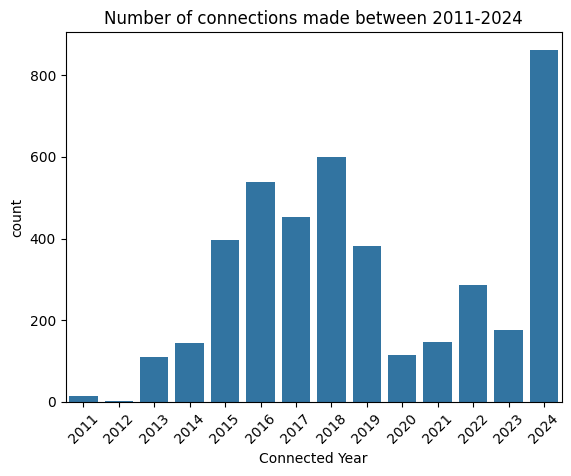

In [8]:
g = sns.barplot((df['Connected Year']).value_counts())
g.set_title("Number of connections made between 2011-2024")
# Rotate the x-ticks
plt.xticks(rotation=45)
# Display the plot
plt.show()

### Number of Connections made across Years 2016-2018 and Year 2024

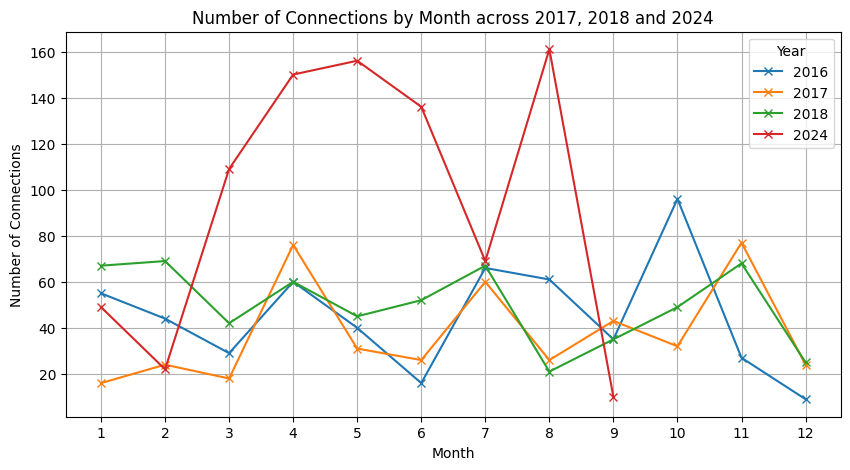

In [9]:
df['Connected Month'] =  pd.to_datetime(df['Connected On']).dt.month
# Plotting
plt.figure(figsize=(10, 5))

for year in [2016, 2017, 2018, 2024]:
    yearly_data = df[df['Connected Year'] == year]
    month_counts = yearly_data['Connected Month'].value_counts().sort_index()  # Ensure months are sorted
    plt.plot(month_counts.index, month_counts.values, marker='x', label=str(year))

plt.title('Number of Connections by Month across 2017, 2018 and 2024')
plt.xlabel('Month')
plt.ylabel('Number of Connections')
plt.xticks(range(1, 13))  # Set x-axis ticks to represent months 1-12
plt.legend(title='Year')
plt.grid(True)
plt.show()

### Word Cloud of Position of Connections

In [10]:
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for year in [2017, 2024]:
    # Filter the DataFrame for the current year in the loop
    yearly_data = df[df['Connected Year'] == year]
    
    # Assuming 'Position' is the column containing the text data
    text = " ".join(yearly_data['Position'].astype(str))
    
    # Remove all numbers and punctuation
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove numbers
    
    # Create and generate a word cloud image
    wordcloud = WordCloud().generate(text)
    
    # Display the generated image with the year as the title
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {year}")
    plt.axis("off")  # Turn off the axis
    plt.show()  # Display the word cloud image


ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
# Filter the DataFrame for the year 2024 and month 8
yearly_data = df[(df['Connected Year'] == 2024) & (df['Connected Month'].isin([7,8]))]

# Assuming 'Position' is the column containing the text data
text = " ".join(yearly_data['Position'].astype(str))

# Remove all numbers and punctuation
text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
text = re.sub(r'\d+', '', text)      # Remove numbers

# Create and generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Turn off the axis
plt.show()  # Display the word cloud image

In [ ]:
# Select a column to analyze
column_data = df['Company'].tolist()
openai.api_key = api_key

# # Create a chat completion request to analyze the column data
# chat_completion = openai.chat.completions.create(
#     messages=[
#         {
#             "role": "user",
#             "content": f"Analyze the following data:\n{column_data}",
#         }
#     ],
#     model="gpt-3.5-turbo",
# )

# # Print the response from the model
# print(chat_completion.choices[0].message["content"].strip())